In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("train_file.csv", encoding="ISO 8859-1")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [19]:
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [20]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [21]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [23]:
df['Gender'].fillna('Male', inplace = True)
df['Married'].fillna('Yes', inplace = True)
df['Dependents'].fillna('0', inplace = True)
df['Self_Employed'].fillna('No', inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

In [26]:
df = df.drop('Loan_ID', axis=1)

In [27]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
df['Married'].replace({'Yes':1, 'No':0}, inplace=True)
df['Self_Employed'].replace({'Yes':1, 'No':0}, inplace=True)
df['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
df['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Property_Area'] = encoder.fit_transform(df['Property_Area'])
df['Dependents'] = encoder.fit_transform(df['Dependents'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

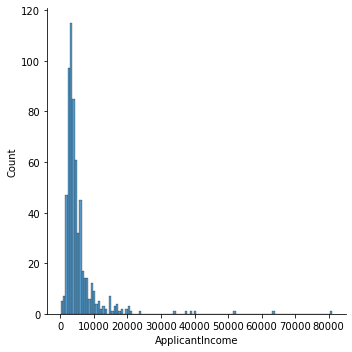

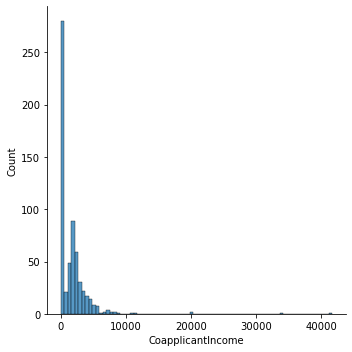

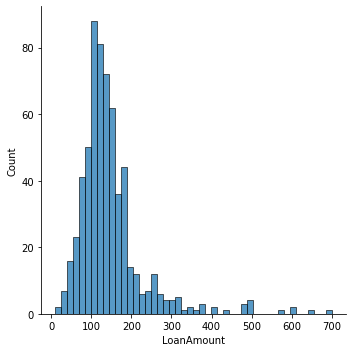

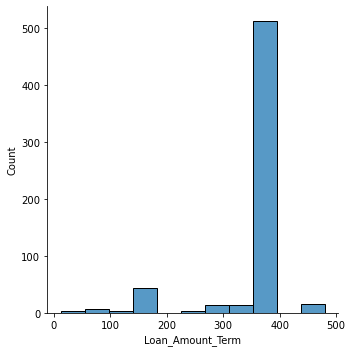

In [48]:
sns.displot(df['ApplicantIncome'])
sns.displot(df['CoapplicantIncome'])
sns.displot(df['LoanAmount'])
sns.displot(df['Loan_Amount_Term'])

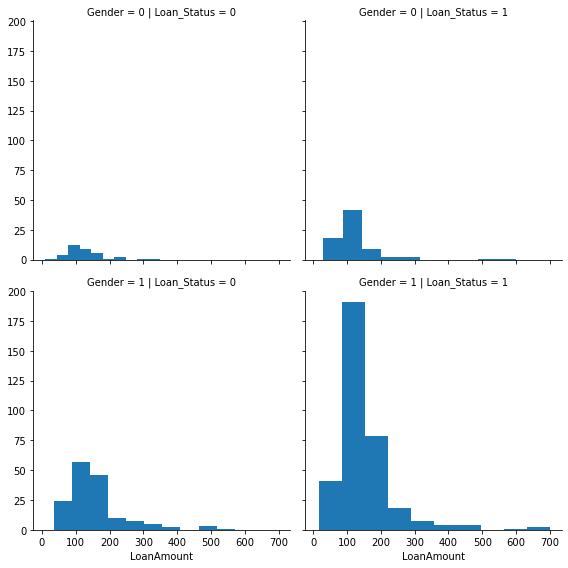

In [49]:
g2 = sns.FacetGrid(df, row='Gender', col='Loan_Status', height=4) 
g2.map(plt.hist, "LoanAmount")

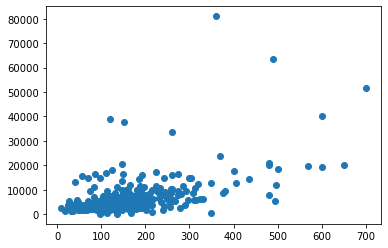

In [51]:
plt.scatter(df['LoanAmount'], df['ApplicantIncome'])

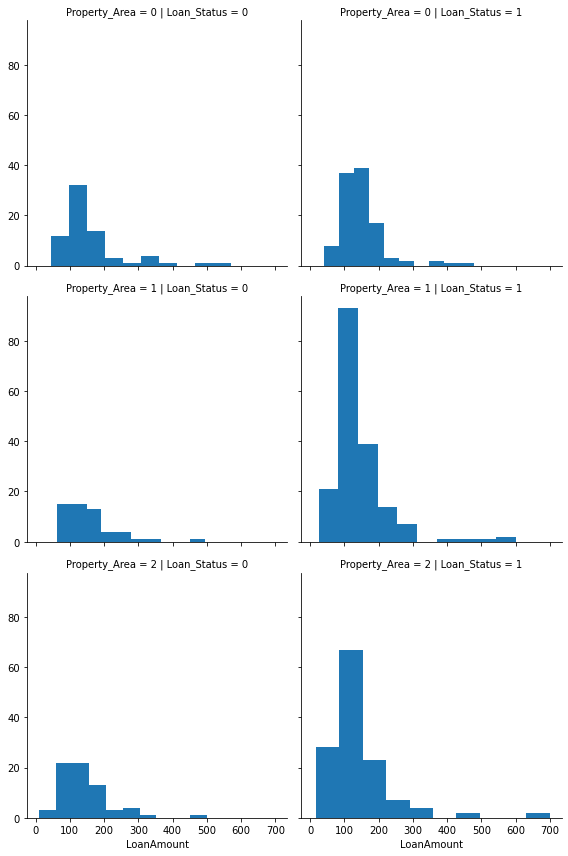

In [52]:
g2 = sns.FacetGrid(df, row='Property_Area', col='Loan_Status', height=4) 
g2.map(plt.hist, "LoanAmount")